In [1]:
#Data Visualization 2
#โดยทั่วไป ชุดข้อมูลจริงๆมักประกอบด้วยข้อมูลที่มีหลายมิติ บทที่ผ่านมาจะวิเคราะห์ เพียงคุณลักษณะทั่วไป ดูค่าเฉลี่ย ความถี่ ค่าสูงสุด ต่ำสุด แต่บทนี้จะพิจารณาความสัมพันธ์ของข้อมูลผ่านการ พล็อตจุด Scatter Pairplot Heatmap
#ไฟล์ข้อมูลสำหรับบทนี้
#เป็นตัวอย่างการเก็บข้อมูลงานวิจัยปุ๋ยเคมี3แบบ สำหรับเพิ่มผลผลิตทางเกษตร เรี่ยกว่า3Treatment โดยสิ่งที่สนใจคือ วิเคราะห์ข้อมูลดูว่าปุ๋ยแบบใดให้ผลผลิตการเกษตรที่ดีที่สุด มีตัวแปรดังนี้
# TA TB TC คือ อัตราการให้ปุ๋ย ของ 3 ชนิด เช่น TA =20 คือการให้ปุ๋ยชนิด TA 20 g
# product ผลผลิตที่ได้ จากการทดลอง
# region เขตพื้นที่ ที่ทำการทดลอง
# light สภาพการทดลองแบบฉายแสงพิเศษ yes/no คือ การให้แสงและไม่ได้ให้แสง


# Workshop 1: โหลดข้อมูลและตรวจสอบเบื้องต้น

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#data set in seaborn
# 'anscombe'
# 'attention'
# 'brain_networks'
# 'car_crashes'
# 'diamonds'
# 'dots'
# 'exercise'
# 'flights'
# 'fmri'
# 'gammas'
# 'geyser'
# 'iris'
# 'mpg'
# 'penguins'-
# 'planets'
# 'tips'
# 'titanic'

df = sns.load_dataset('tips')

# df.head()
# df.tail()
df.sample(5) # สุ่มเลือก5ตัวอย่าง
#df.info() # แสดงรายละเอียดทั้งหมด
# df.columns

#df.isnull().sum() #ตรวจหาข้อมูลที่สูญหาย
#df.describe() #หาค่าสถิติเบื้องตินไม่กำหนดจุดทศนิยม
#df.describe().round(2) #แบบแสดงทิศนิยม 2 ตำแหน่ง

,total_bill,tip,sex,smoker,day,time,size
181,23.33,5.65,Male,Yes,Sun,Dinner,2
81,16.66,3.40,Male,No,Thur,Lunch,2
2,21.01,3.50,Male,No,Sun,Dinner,3
35,24.06,3.60,Male,No,Sat,Dinner,3
87,18.28,4.00,Male,No,Thur,Lunch,2


# Workshop 2: พล็อตกราฟดูการกระจาย ด้วย distplot()

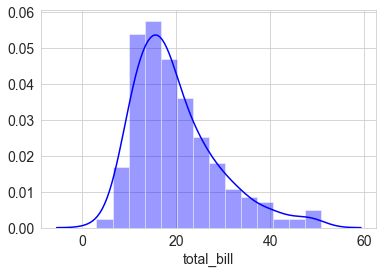

In [3]:
sns.set_style('whitegrid') # รูปแบบแสดงเส้นกริดสีขาว พื้นเท่า
plt.rcParams.update({'font.size':14})
sns.distplot(df['total_bill'], color = 'b') # b=blue
plt.show()
#จากกราฟจะเห็นได้ว่า ค่าเฉลี่ยอยู่ที่ 19-20

# Workshop 3: พล็อต Scatter ดูความสัมพันธ์

In [4]:
#พล็อตแบบ Scatter เพื่อดูความสัมพธ์ ของแต่ละตัวแปร
#sns.scatterplot(x='total_bill', y='tip', data=df)
#sns.scatterplot(x='TA',y='product',data = df)
#plt.show()
#TA เพิ่ม Product เพิ่ม
#sns.scatterplot(x='TB',y='product',data = df)
#plt.show()
#TฺB เพิ่ม Product ฟุ้งกระจายตัว แสดงว่าไม่มีผลต่อกันมากนัก
#sns.scatterplot(x='TC',y='product',data = df)
#plt.show()
#TฺCเพิ่ม Product คงที่ แสดงว่าไม่มีผลต่อกัน

# Workshop 4: พล็อต Scatter ในกราฟเดียว

In [5]:
#sns.scatterplot(x='TA',y='product',data=df,label='TA')
#sns.scatterplot(x='TB',y='product',data=df,label='TB')
#sns.scatterplot(x='TC',y='product',data=df,label='TC')
#plt.legend(loc='lower right') #หากต้องการให้ legend แสดงมุมล่างขวา
#หากต้องการปรับlegendให้ไม่บังจุดให้ใช้ loc = 'upper right'/'upper left'/'lower left'/'center left'
#จากกราฟจะเห็นได้ว่า TA มีผลต่อ product มากกว่า

# Workshop 5: การใช้ Subplot กับ Scatter

In [6]:
#ในกรณีที่พล็อต Scatter แล้วปรากฎว่าพบจุดทับกันมาก การดูรวมแบบที่ผ่านมาทำได้ยากดังนั้นการพล็อตเรียงกันอยู่ในแนวเดียวกัน ใกล้ๆกันจะช่วยให้เปรียบเทียบกันได้ชัดเจนขึ้น

#Subplot แถวเดียว หลายคอลัมน์
#กรณีจุดข้อมูลมีส่วนทับซ้อนกัน ถ้าต้องการพล็อตแยก แต่ต้องการให้อยู่แนวเดียวกันเพื่อเปรียบเทียบ ให้ใช้ subplot

#f, axes = plt.subplot(1, 3,figsize=(10,3))
#sns.scatterplot(x='TA',y='product',data=df,ax=axes[0])
#sns.scatterplot(x='TB',y='product',data=df,ax=axes[1])
#sns.scatterplot(x='TC',y='product',data=df,ax=axes[2])

#หลักการคือแบ่ง subplot ออกเป็น r แถว c คอลัมน์ด้วย subplots(1,3) จากนั้นสั่งพล็อตกราฟแต่ตัวแปรลงในคอลัมน์ที่ต้องการ โดยกำหนดเลขคอลัมน์ 0 1 2 เช่น axes[0][1] and [2]
#การแบ่ง subplot หลายแถว หลายคอลัมน์
#หลักการคือแบ่ง subplot ออกเป็น r แถว c คอลัมน์ด้วย subplots(r,c) เช่น 2,2 จากนั้นสั่งพล็อตแต่ละกราฟลงในคอลัมน์และแถว โดยกำหนดเลข เช่น axes[0][0] คือ [r][c]

# Workshop 6: วิเคราะห์ผลการให้แสง

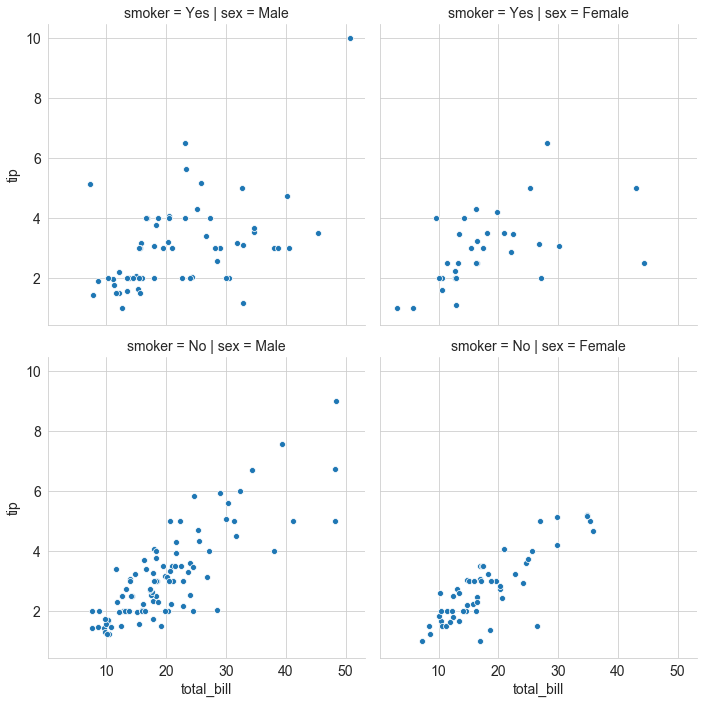

In [7]:
#ในงานวิจัย มีการแยกการทดลอง(Treatment) ให้ปุ๋ยในสภาพแวดล้อมที่มีการฉายแสงพิเศษและแบบปกติ โดยคอลัมน์ที่บันทึกข้อมูลคือ light =yes/no โดย yes คือการทดลองแบบมีการฉายแสงพิเศษ
#ส่วน no คือไม่มี(ทดลองภายใต้แสงธรรมชาติ) Workshop นี้จะมาวิเคราะห์ดูว่า การฉายแสงพิเศษมีผลกับการเจริญเติบโตหรือไม่ (ต่อไปจะเรียกสั้นๆ ว่าฉายแสง กับ แสงปกติ)
#ตัวอย่างแรกคือการ scatterplot ให้จุดข้อมูล อยู่ในกราฟเดียวกัน แต่แยกสีระหว่าง light = yes / no วิธีที่ใช้คือการ hue ระบุว่าคอลัมน์ใดแยกสั

#sns.scatterplot(x='total_bill',y='tip', data=df ,hue='smoker') #ลอง
#sns.scatterplot(x='TA',y='product', data=df, hue='light') # ใช้ scatterplot
plt.show()
#g= sns.scatterplot(x='TA', y='product',data =df, hue='light')
#g.fig.set_size_inches(6,4) #set ความกว้าง ความสูงกราฟ
#จากกรฟาจะเห็นว่า การทดลอง treatment ให้ปุ๋ยโดยการฉายแสง จะให้ผลผลิตที่สูงกว่าแบบแสงปกติ  (Seaborn realplot == sns.relplot==sns.scatterplot)

#บางข้อมูลอาจซ้อนทับกัน ทำให้มองกราฟได้ไม่ชัดเจน ให้ใช้วิธีแบ่งคอลัมน์แล้วplot
#sns.relplot(x='total_bill',y='tip',data=df,col='smoker') #ลอง
#sns.replot(x='TA',y='product',data=df,col='light') #ใช้colแยกเป็น2กราฟ
#sns.relplot(x='TB',y='product',data=df,col='light')
#sns.relplot(x='TC',y='product',data=df,col='light')
plt.show()
#จากราฟจะเห็นว่าการทดลองให้ปุ๋ย TA และ TB ภายใตสภาวะการฉายแสง จะได้ผลผลิตสูงกว่าการทดลองแบบใช้แสงปกติ อย่างเห็นได้ชัด ส่วนปุ๋ยแบบ TC การฉายแสง ไม่ค่อยมีผลเท่าใดนัก
# สรุป hue ใช้แยกสีในผืนกราฟเดียวกัน ส่วน col ใช้แยกคตอลัมน์เหมาะสำหรับดูจุดที่ซ้อนทับกัน
# หากต้องการแยกกราฟเรียงกันลงมา (แนวrow) สามารถใช้คำสั่งนี้ได้

#sns.relplot(x='total_bill',y='tip',data=df,row='smoker') #แยกกราฟตามแถว
#sns.relplot(x='TA',y='product',data=df,row='light')

#กำหนด row และ colให้กราฟ
#กรณีต้องการเปรียบเทียบหลายมิติ สามารถใช้ได้ทั้ง row และ col ได้เช่น ต้องการพล็อตกราฟเปรียบเทียบ โดยให้คอลัมน์ แสดงกราฟของพื้นที่การทดลองในแต่ละภาค(region)ส่วนแนว row(เรียงในแนวดิ่ง)
g= sns.relplot(x='total_bill', y='tip',data=df, col='sex',row = 'smoker')
#g= sns.relplot( x= 'TA',y='product', data =df, col ='region',row='light') #จะสลับก็ได้
# g= snsreplot(x='TA',y='product',data=df,col='light',row='region')
#g.fig.set_size_inches(9,5) #ปรับขนาดภาพ

# Workshop 7: Jointplot

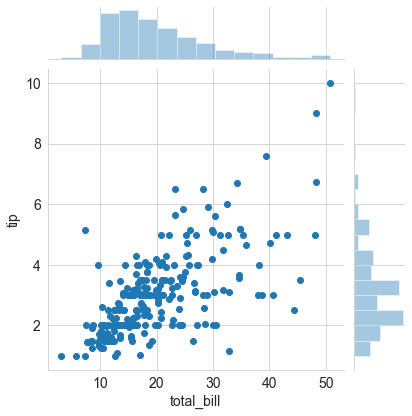

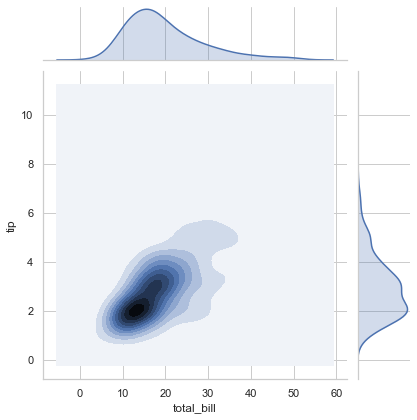

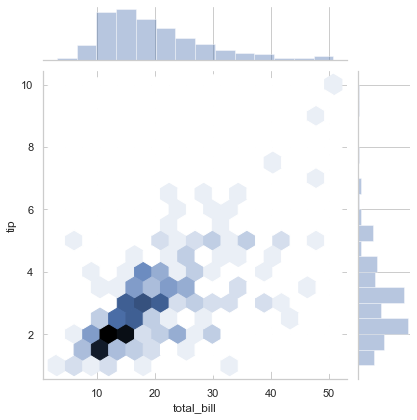

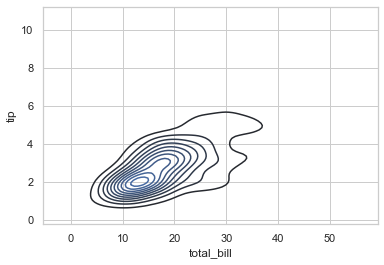

In [8]:
#คล้ายกับ scatterplot แต่มีข้อมูลกำกับคล้ายๆกับมี Histogram บอกความถี่ และ KDE plot แสดงการกระจายที่แกน x,y
#sns.jointplot(x='TA',y='product',data=df)
sns.jointplot(x='total_bill',y='tip',data=df)
plt.show()

#ปรับแต่ง1 เพิ่ม kind = 'kde'
sns.set(style="ticks")
sns.set_style('whitegrid')
#sns.jointplot(x='TA',y='product',data=df,kind='kde')
sns.jointplot(x='total_bill',y='tip',data=df,kind='kde')
plt.show()

#ปรับแต่ง2 เพิ่ม kind='hex'
#sns.jointplot(x='TA',y='product',data=df,kind='hex')
sns.jointplot(x='total_bill',y='tip',data=df, kind='hex')
plt.show()
#sns.kdeplot(df['TA'],df['product'])
sns.kdeplot(df['total_bill'],df['tip']) #คำสั่งจะไม่เหมือนกราฟอื่น
plt.show()

# Workshop 8: Swarmplot

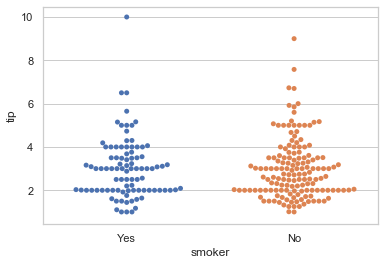

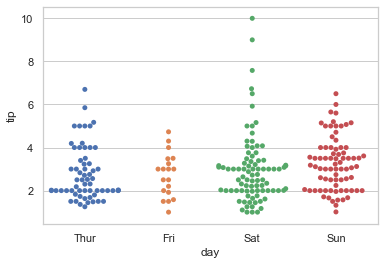

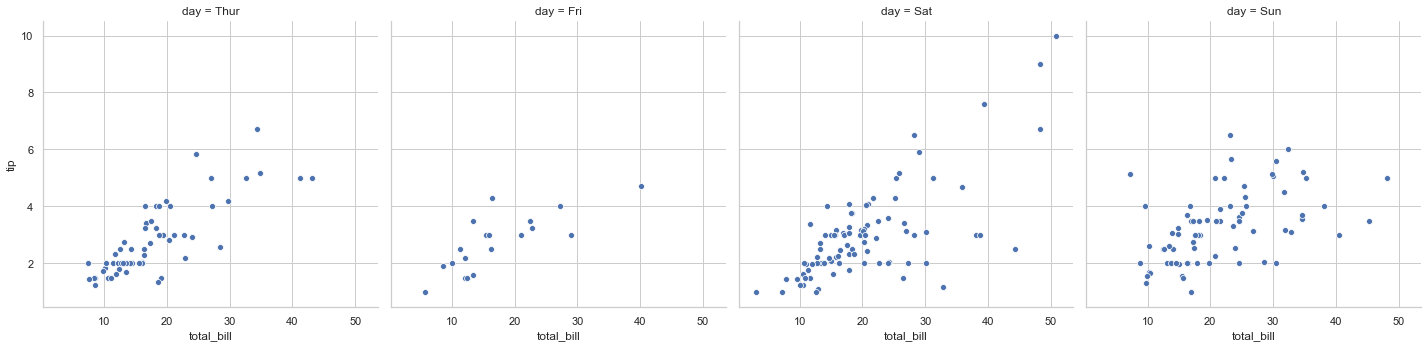

In [9]:
#กราฟชนิดนี้เหมาะกับดูค่า 2 ตัวแปร โดยค่าแกน x ควรเป็นข้อมูลแบบไม่ต่อเนื่อง หรือข้อมูลแบบหมวดหมู่รวมไปถึง ข้อมูลนามบัญญัติ(Norminal data) หรือเรียงลำดับ(Ordinal data)
#ตัวแปรต้น ไม่ต่อเนื่อง ตัวแปรตามต่อเนื่อง
sns.swarmplot(x='smoker',y='tip',data=df)
#sns.swarmplot(x='light',y='product',data=df)
plt.show()
#ความหมาย คือ light=yes จุดจะเกาะกลุ่มสูงกว่า light=no ตีความได้ว่า แบบฉายแสงจะได้ผลผลิตที่ดีกว่า(ถ้าให้ถูกต้องจะต้องใช้วิธีทางสถิติ เช่น t-test)

#กราฟเปรียบเทียบผลผลิตแต่ละภาคจากกราฟ จะเห็นว่าแต่ละภาคมีจุดข้อมูลการกระจายคล้ายกัน ผลผลิตแทบไม่แตกต่างกัน
sns.swarmplot(x='day',y='tip',data=df)
#sns.swarmplot(x='region',y='product',data=df)
plt.show()

#sns.relplot(x='TA', y='product', data=df,col=r'region)
#กราฟแรกมีความสัมพันธ์เชิงบวก คือไปทางเดียวกันอีก #กราฟสองไม่มีความสัมพันธ์ เมื่อตัวแปรนึงเพิ่มอีกตัวแปรไม่มีความสัมพันธ์ใดๆ #กราฟที่สามความสัมพันธ์เบิงลบ ตัวแปรนึงเพิ่มอีกตัวแปรลด
sns.relplot( x='total_bill', y='tip', data=df, col='day')
plt.show()

# Workshop 9: สหสัมพันธ์

In [10]:
# Correlation เป็นการหาความสัมพันธ์ระหว่างตัวแปร 2 ตัว โดยการใช้ค่า Correlation Coefficient(r) เป็นตัวบ่งชี้ความสัมพันธ์นี้ ซึ่งค่า Correlation coefficient จะมีค่าระหว่า -1.0 ถึง +1.0 
# 0 : ทั้งสองตัวแปรไม่มีความสัมพันธ์ต่อกัน
# + : ทั้งสองตัวแปรมีความสัมพันธ์กัน ถ้ามีค่าเข้าใกล้1แสดงว่ามีความสัมพันธ์กันสูงมาก (Strong positive coefficient)
# - : ทั้งสองตัวแปรมีความสัมพันธ์แบบตรงกันข้าม ถ้ามีค่าเข้าใกล้ -1.0 แสดงว่าสัมพันธ์แบบตรงกันข้ามอย่างแรง
#!!!! ค่า corr แสดงถึงแนวโน้มความสัมพันธ์เท่านั้น แต่ไม่ได้บ่งบอกว่าตัวแปรใดเป็นสาเหตุให้ตัวแปรใดเพิ่มขึ้นหรือลดลง (ไม่ได้บ่งบอกตัวใดเป็นสาเหตุ)ผู้วิเคราะห์จะต้องใช้หลักวิชาการอื่นๆเข้ามาสรุปหาสาเหตุ

#corr_val =df.corr()
corr_val = df.corr().round(2) #แสดง corr_vall ในรูปทศนิยม2ตำแหน่ง
corr_val
#Pandas จะแสดงเป็นตารางให้จับคู่ดูทีละคู่ว่ามีค่าความสัมพนธ์อย่างไร ให้ดูทีละคู่ TA-product TB-product

#columns = ['TA','TB','TC','product']
#corr_val = df[columns].corr().round(2)
#corr_val
#การคำนวณหาค่า corr Pandas จะนำตัวแปรที่เป็นค่าตัวเลขออกมาคำนวณให้ ซึ่งสังเกตว่าขณะนี้ ตัวแปรเกี่ยวกับ light จะไม่มีการคำนวณใดๆ เนื่องจากเป็น Category or String Object
df.info()
#จะเห็นว่า light เป็นชนิด Object หรือ String (มี่ค่าเป็น yes/no)ถ้าต้องการให้คำนวณหาค่าสัมประสิทธิ์สหสัมพันธ์ ให้เพิ่มคอลัมน์ lightnum แล้วเติมค่าโดยให้ light=yes เป็น 1 และ light = no เป็น 0
#ใช้โค้ด 2 แบบ
#ใช้เงื่อนไขการค้นหา trplace ของ pandas
#df['smokernum'] = df['smoker'].replace('Yes',1) # add 1 for yes
#df['smokernum'] = df['smokernum'].replace('No',0) # add 0 for no โดยเขียนทับ smokernum
#df.sample(6)
#df.['lightnum']=df['light'].replace('yes',1)
#df.['lightnum']=df['lightnum'].replace('no',0) 

#ใช้ numpy
#รูปแบบคำสั่ง df[column] = np.where (เงื่อนไข,ถ้าใช่,ถ้าไม่ใช่)
import numpy as np
df['smokernum'] = np.where(df.smoker.str.match('Yes'),1,0) #ใช้ numpy.where(ตัวแปรสตริงตรงกับYes,ถ้าใช่แทน1,ถ้าไม่ใช่ใส่0)
df.sample(5)
#นับ  yes no
#df.groupby('smoker').count()
#df.groupby('smokernum').count()
#df.groupby('light').count()
#df.groupby('lightnum').count()

corr_val = df.corr().round(2)
corr_val
#จะเเห็นว่าcorr lightnum-productมีค่าเท่ากับ 0.53 แสดงว่าการฉายแสงมีผลกับ product ทางบวก ซึ่งตรงกับที่เราได้ลองพล็อตดูข้อมูลก่อนหน้านี้
#กรณสนใจแค่บางตัวให้ระบุไป
col = ['total_bill','smokernum']
corr_val =df[col].corr().round(2)
corr_val
#การใช้ correalation ช่วยให้การตัดสินใจได้แม่นยำขึ้นเนื่องจากมีข้อมูลเป็นตัวเลข ง่ายกว่าการมองกราฟ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


,total_bill,smokernum
total_bill,1.00,0.09
smokernum,0.09,1.00


# Workshop 10 : Heatmap

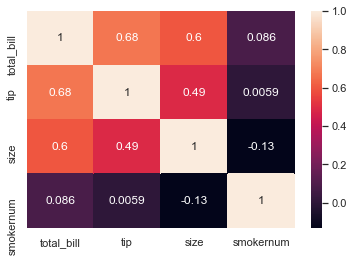

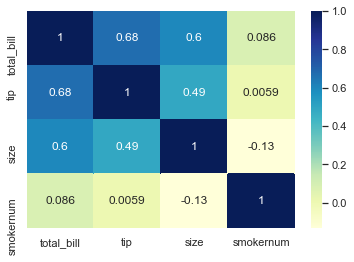

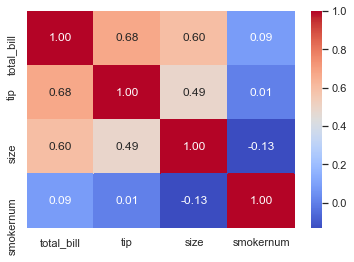

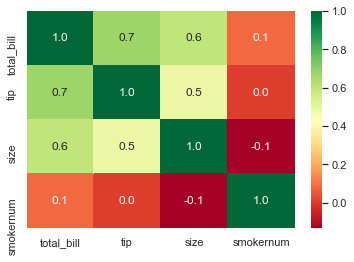

In [11]:
#ในกรณีที่มีตัวแปรหลายตัวแปร(จับกันหลายคู่)การเกิดเป็นตารางอาจทำให้ดูยากการใช้ Heatmap จะทำการลงเฉดสี ศีเข้ม = ค่ามาก สีจาง=ค่าน้อย
#corr_val จาก Workshop9
corr_val = df.corr()
sns.heatmap(corr_val, annot=True) #annot = แสดงตัวเลข สีอ่อนค่ามาก สีเข้มค่าน้อย Default
#การกำหนดค่า Heatmap
#annot = True แสดงตัวเลข
#cmap เลือกสี 'YlGnBu' 'cooldown' 'RdYlGn'
#fmt คือกำหนดรูปแบบทศนิยม
plt.show()
sns.heatmap(corr_val, annot=True,cmap='YlGnBu')
plt.show()
sns.heatmap(corr_val, annot=True,cmap='coolwarm', fmt='.2f') #blue 2 ตำแหน่ง
plt.show()
# red yel gr ทศนิยม 1ตำแหน่ง
sns.heatmap(corr_val,annot=True,cmap='RdYlGn',fmt='.1f')
plt.show()

# Workshop 11: Pairplot

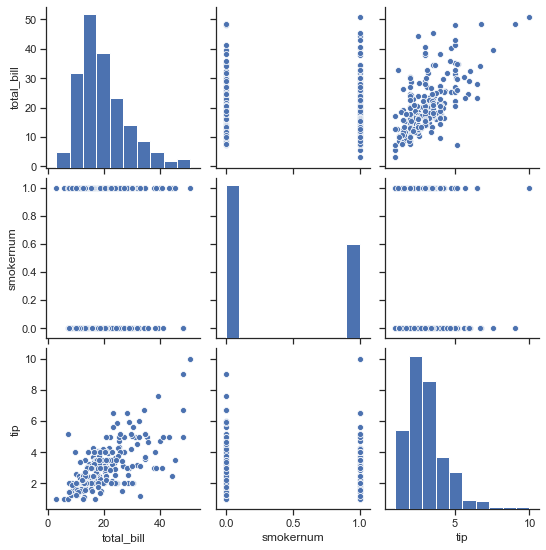

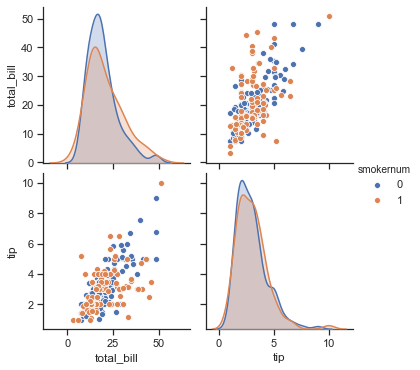

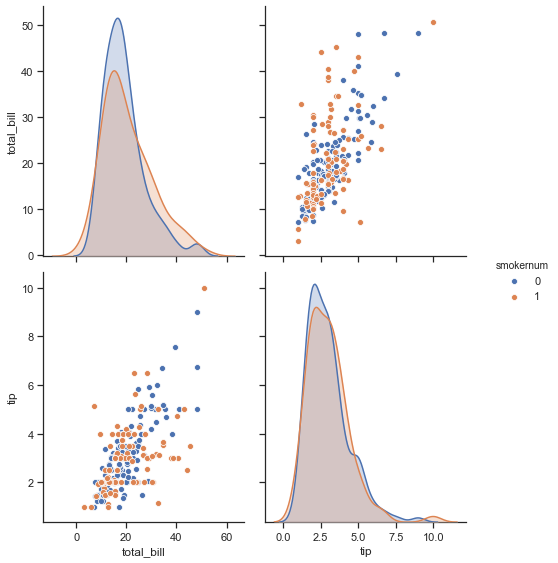

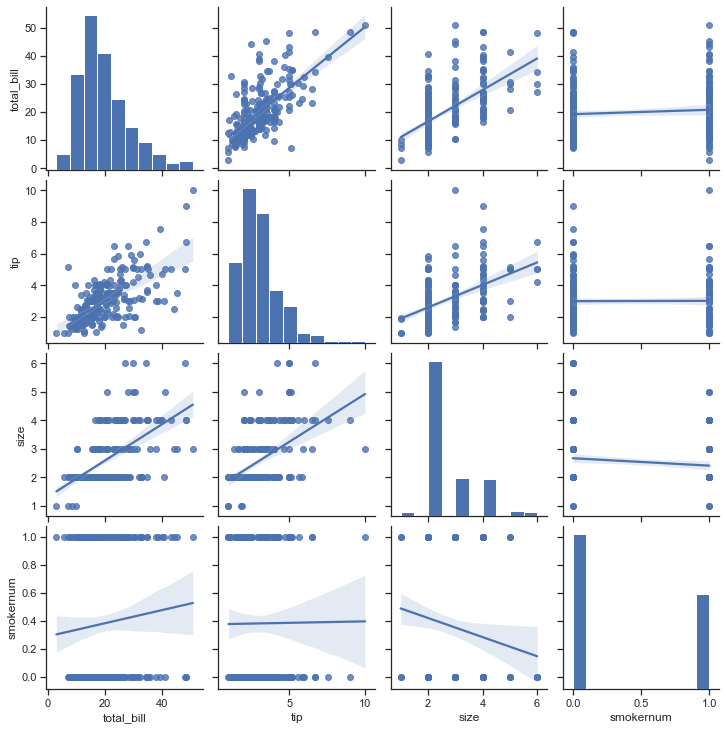

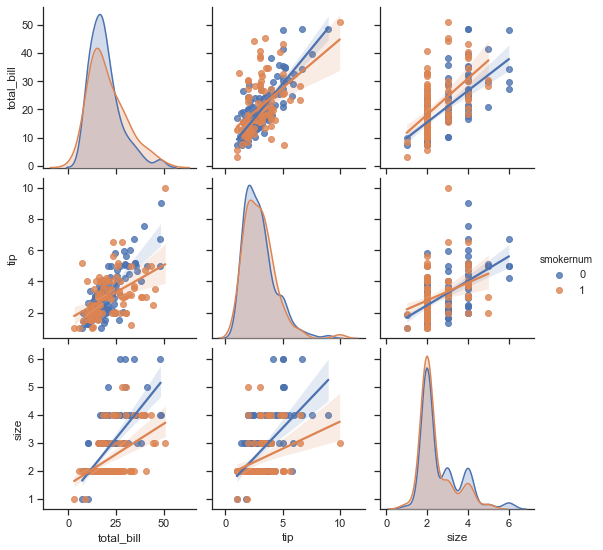

In [12]:
#พล็อตค่าคัวแปรทุกตัวโดยจะใช้ Scatter ทุกคู่ และHistrogram ของทุกตัวแปร เหมาะกับการพล็อตทีเดียวได้กราฟทั้งหมด

sns.set(style='ticks')
#sns.pairplot(df)
#sns.pairplot(df, height=4) #แก้ความสูง
plt.show()
#หากตัวแปรมีจำนวนมากๆเครื่องจะใช้เวลานาน ควรเลือกเฉพาะที่สนใจโดยกำหนดคอลัมน์
columns = ['total_bill','smokernum','tip'] 
sns.pairplot(data=df[columns])
plt.show()
#หรือ Histrogram แบบโค้ง
sns.pairplot(data =df ,vars=['total_bill','tip'], hue='smokernum')
plt.show()

#ลักษณะเหมือนกับพล็อตจับคู่ทั้งหมด หากต้องการดูว่าตัวแปรใดมีความสัมพันธ์กันควรดูcorr ร่วมกับ heatmap
#พล็อตแค่บางตัวแปรเนื่องจากTCไม่เกี่ยวข้องกันเลย
columns = ['total_bill','tip','smokernum']
g = sns.pairplot(data = df[columns],hue='smokernum')
# g =sns.pairplot(df, hue='smoker') #กรณีเอาทุกคอลัมน์
g.fig.set_size_inches(8,8)

sns.pairplot(df, kind='reg') #ต้องการพล็อตให้มีเส้น Regression
plt.show()
#เส้นชันขึ้น ความสัมพันธ์เป็นบวก เส้นราบ ไม่มีความสัมพัธ์ เส้นชันลง ความสัมพันธ์เชิงลบ
g = sns.pairplot(df,kind='reg', hue='smokernum')

#จากกราฟระหว่าง TB-product and TC-product ดูรวมๆพบว่าเส้นแทบจะเป็นแนวนอนแสดงว่าไม่มีความสัมพนธ์ แต่เมื่อกรณีที่มีแสง จะให้ผลผลิตดีข้นถ้าเพาะปลูกอยู่ในสภาพที่ฉายแสง

# Workshop 12 : Lmplot

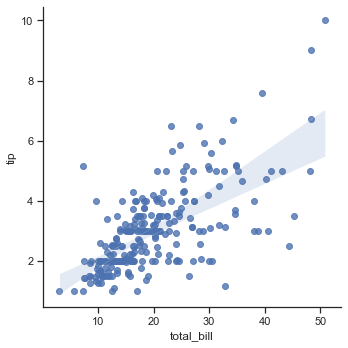

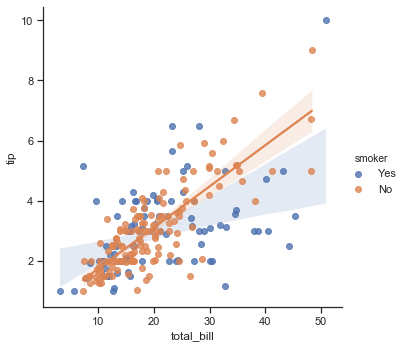

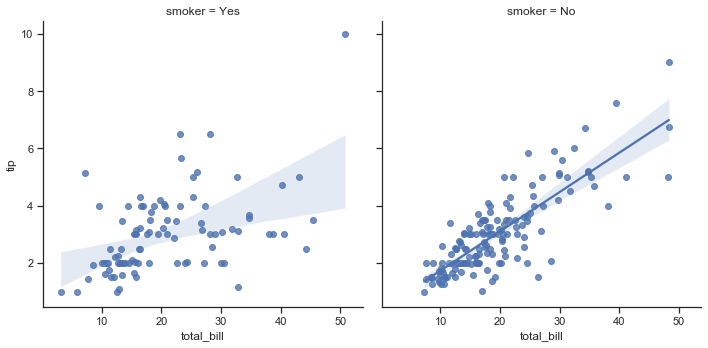

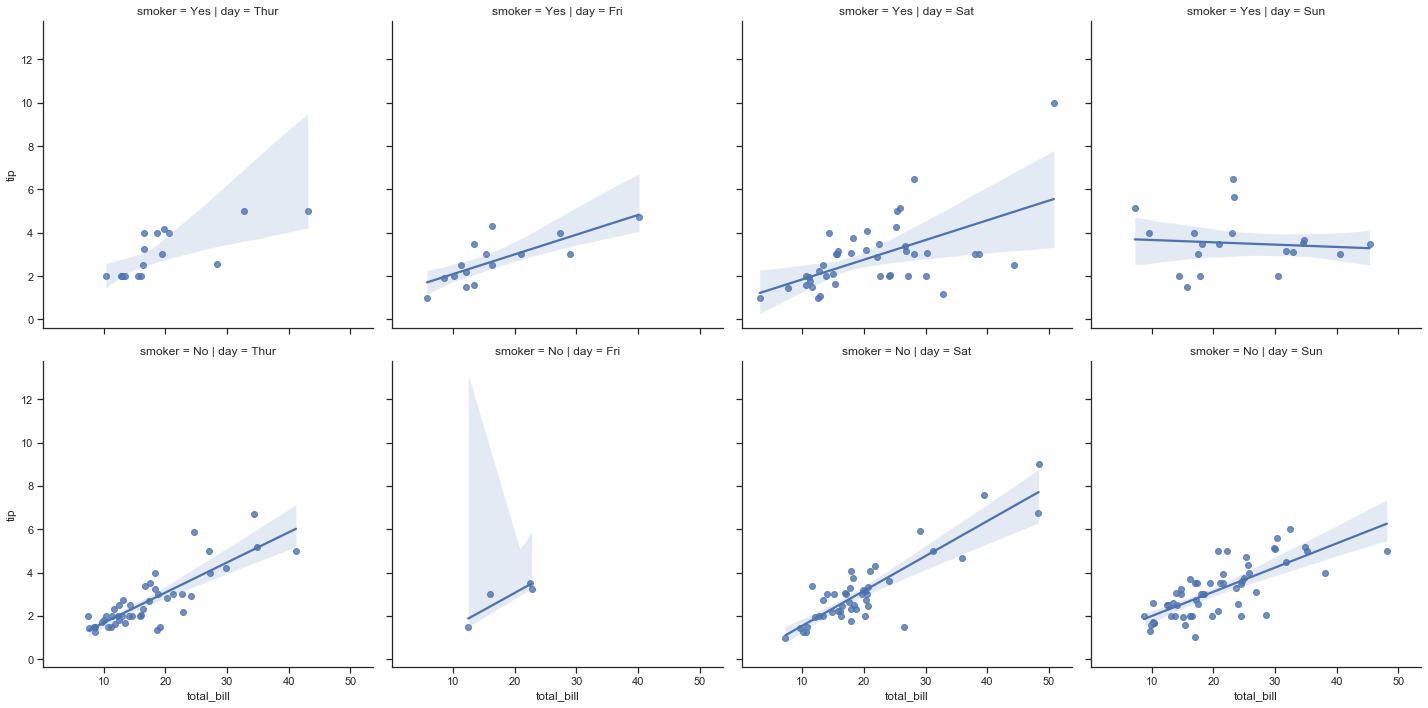

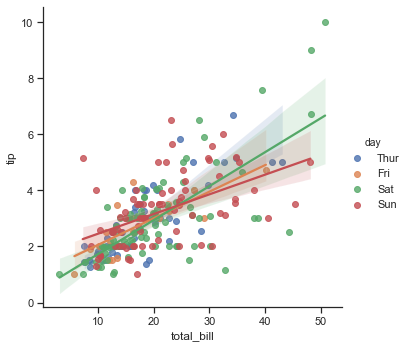

In [13]:
# ใช้สำหรับพล็อตดูเส้น Linear Model เช่น เมื่อเราวิเคราะห์ดูรวมๆแล้วก็มาเน้นดูเฉพาะที่สนใจ เช่น กรณีต้องการดู TA-product และ TB-product
sns.lmplot(x='total_bill',y='tip',data=df)
plt.show()
#sns.lmplot(x='TA',y='product',data=df)
#พล็อตแยก light
# g =sns.lmplot(x='TA',y='product',data=df, hue='light')
g = sns.lmplot(x='total_bill',y='tip',data=df,hue='smoker')
plt.show()
#กรณีไม่แยกสี กราฟระหว่าง light = yes และ no ใข้ 2 กราฟแบ่งกัน
sns.set_style('ticks')
sns.lmplot(x='total_bill',y='tip', data=df,col='smoker')
plt.show()
#กราฟแยกสีเป็นแถวและคอลัมน์
g = sns.lmplot(x='total_bill',y='tip',data=df,row='smoker',col='day')
plt.show()
#lmplot แยกสีเส้น Regression โดยใช้ hue
sns.lmplot(x='total_bill',y='tip',data=df,hue='day')
plt.show()

In [14]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('tips')
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')